In [1]:
from sympy import *
from sympy.abc import *
from sympy.galgebra.ga import *
import numpy as np
from numpy import linalg as LA
from __future__ import print_function
init_printing()

## PDE 
The TTI wave equation for the square slowness m, thomsen parametersd $\epsilon$, $\delta$, $\theta$ and $\Phi$ (dip and asymuth)  and a source q is given in 3D by :

\begin{cases} 
 &m \frac{d^2 p(x,t)}{dt^2} - (1+2\epsilon)(G_{\bar{x}\bar{x}} + G_{\bar{y}\bar{y}}) p(x,t) - \sqrt{(1+2\delta)}G_{\bar{z}\bar{z}} r(x,t) =q  \\
 &m \frac{d^2 r(x,t)}{dt^2} -  \sqrt{(1+2\delta)}(G_{\bar{x}\bar{x}} + G_{\bar{y}\bar{y}}) p(x,t) - G_{\bar{z}\bar{z}} r(x,t) =q    \\
 &u(.,0) = 0 \\
 &\frac{d u(x,t)}{dt}|_{t=0} = 0 
\end{cases}


where
\begin{cases} 
G_{\bar{x}\bar{x}} & = cos(\phi)^2 cos(\theta)^2 \frac{d^2}{dx^2} +sin(\phi)^2 cos(\theta)^2 \frac{d^2}{dy^2}+ sin(\theta)^2 \frac{d^2}{dz^2} + sin(2\phi) cos(\theta)^2 \frac{d^2}{dx dy} - sin(\phi) sin(2\theta) \frac{d^2}{dy dz} -cos(\phi) sin(2\theta) \frac{d^2}{dx dz} \\
G_{\bar{y}\bar{y}} & =  sin(\phi)^2 \frac{d^2}{dx^2} +cos(\phi)^2  \frac{d^2}{dy^2} - sin(2\phi)^2 \frac{d^2}{dx dy}\\
G_{\bar{z}\bar{z}} & = cos(\phi)^2 sin(\theta)^2 \frac{d^2}{dx^2} +sin(\phi)^2 sin(\theta)^2 \frac{d^2}{dy^2}+ cos(\theta)^2 \frac{d^2}{dz^2} + sin(2\phi) sin(\theta)^2 \frac{d^2}{dx dy} + sin(\phi) sin(2\theta) \frac{d^2}{dy dz} +cos(\phi) sin(2\theta) \frac{d^2}{dx dz} \\ 
\end{cases}
with the zero initial conditons to guaranty unicity of the solution

It correspondto a velocity model where the velocity in the z direction is different from the velocity in the xy plane

## Adjoint PDE 
The TTI wave equation for the square slowness m, thomsen parametersd $\epsilon$, $\delta$, $\theta$ and $\Phi$ (dip and asymuth)  and a source q is given in 3D by :

\begin{cases} 
 &m \frac{d^2 p(x,t)}{dt^2} - (G_{\bar{x}\bar{x}} + G_{\bar{y}\bar{y}})^T((1+2\epsilon) p(x,t)) - G_{\bar{z}\bar{z}}^T(\sqrt{(1+2\delta)} r(x,t)) =q  \\
 &m \frac{d^2 r(x,t)}{dt^2} -  (G_{\bar{x}\bar{x}} + G_{\bar{y}\bar{y}})^T(\sqrt{(1+2\delta)} p(x,t)) - G_{\bar{z}\bar{z}}^T r(x,t) =q    \\
 &u(.,T) = 0 \\
 &\frac{d u(x,t)}{dt}|_{t=T} = 0 
\end{cases}


where
\begin{cases} 
G_{\bar{x}\bar{x}} & = cos(\phi)^2 cos(\theta)^2 \frac{d^2}{dx^2} +sin(\phi)^2 cos(\theta)^2 \frac{d^2}{dy^2}+ sin(\theta)^2 \frac{d^2}{dz^2} + sin(2\phi) cos(\theta)^2 \frac{d^2}{dx dy} - sin(\phi) sin(2\theta) \frac{d^2}{dy dz} -cos(\phi) sin(2\theta) \frac{d^2}{dx dz} \\
G_{\bar{y}\bar{y}} & =  sin(\phi)^2 \frac{d^2}{dx^2} +cos(\phi)^2  \frac{d^2}{dy^2} - sin(2\phi)^2 \frac{d^2}{dx dy}\\
G_{\bar{z}\bar{z}} & = cos(\phi)^2 sin(\theta)^2 \frac{d^2}{dx^2} +sin(\phi)^2 sin(\theta)^2 \frac{d^2}{dy^2}+ cos(\theta)^2 \frac{d^2}{dz^2} + sin(2\phi) sin(\theta)^2 \frac{d^2}{dx dy} + sin(\phi) sin(2\theta) \frac{d^2}{dy dz} +cos(\phi) sin(2\theta) \frac{d^2}{dx dz} \\ 
\end{cases}
with the zero initial conditons to guaranty unicity of the solution

It correspondto a velocity model where the velocity in the z direction is different from the velocity in the xy plane

# Finite differences in practice
We will use a compact 4th order finite difference schemefor the cross derivatives

\begin{cases} 
  \frac{d^2 p(x,y,z)}{dx dz} = \frac{1}{2}(-2p(x,y,z,t) + p(x,y,z+h,t) + p(x,y,z-h,t) - p(x+h,y,z-h,t) + p(x-h,y,z,t) - p(x-h,y,z+h,t) + p(x+h,y,z,t))
\end{cases}

he Taylor expansion shows that with this scheme we have 
\begin{cases} 
  \frac{1}{2}(-2p(x,y,z,t) + p(x,y,z+h,t) + p(x,y,z-h,t) - p(x+h,y,z-h,t) + p(x-h,y,z,t) - p(x-h,y,z+h,t) + p(x+h,y,z,t)) = \frac{d^2 p(x,y,z)}{dx dz}+ O(dx^4,dz^4,dx^\alpha dz^\beta : \alpha+\beta >3)
\end{cases}

In [2]:
p=Function('p')
r=Function('r')

s,h,x,y,z = symbols('s h x y z')
m=M(x,y,z)
q=Q(x,y,z,t)
d=D(x,y,z,t)
e=E(x,y,z)

A=epsilon(x,y,z)  # (1 + 2epsilon) but make the symbolic simpler
B=delta(x,y,z) # sqrt(1 + 2epsilon) but make the symbolic simpler
Th=theta(x,y,z)
Ph=phi(x,y,z)
# Weights to sum the two fields
w1=.5
w2=.5

In [3]:
dttp=as_finite_diff(p(x,y,z,t).diff(t,t), [t-s,t, t+s])
dttr=as_finite_diff(r(x,y,z,t).diff(t,t), [t-s,t, t+s])
dtp=as_finite_diff(p(x,y,z,t).diff(t), [t-s,t])
dtr=as_finite_diff(r(x,y,z,t).diff(t), [t-s,t])
# Spacial finite differences can easily be extended to higher order by increasing the list of sampling point in the next expression. 
# Be sure to keep this stencil symmetric and everything else in the notebook will follow.
dxxp=as_finite_diff(p(x,y,z,t).diff(x,x), [x-h, x, x+h]) 
dyyp=as_finite_diff(p(x,y,z,t).diff(y,y), [y-h, y, y+h]) 
dzzp=as_finite_diff(p(x,y,z,t).diff(z,z), [z-h, z, z+h])
dxxr=as_finite_diff(r(x,y,z,t).diff(x,x), [x-h, x, x+h]) 
dyyr=as_finite_diff(r(x,y,z,t).diff(y,y), [y-h, y, y+h]) 
dzzr=as_finite_diff(r(x,y,z,t).diff(z,z), [z-h, z, z+h])


# My 4th order stencil for cross derivatives
dxzp = .5/(h**2)*(-2*p(x,y,z,t) + p(x,y,z+h,t) + p(x,y,z-h,t) - p(x+h,y,z-h,t) + p(x-h,y,z,t) - p(x-h,y,z+h,t) + p(x+h,y,z,t))
dxzr = .5/(h**2)*(-2*r(x,y,z,t) + r(x,y,z+h,t) + r(x,y,z-h,t) - r(x+h,y,z-h,t) + r(x-h,y,z,t) - r(x-h,y,z+h,t) + r(x+h,y,z,t))

dxyp = .5/(h**2)*(-2*p(x,y,z,t) + p(x,y+h,z,t) + p(x,y-h,z,t) - p(x+h,y-h,z,t) + p(x-h,y,z,t) - p(x-h,y+h,z,t) + p(x+h,y,z,t))
dxyr = .5/(h**2)*(-2*r(x,y,z,t) + r(x,y+h,z,t) + r(x,y-h,z,t) - r(x+h,y-h,z,t) + r(x-h,y,z,t) - r(x-h,y+h,z,t) + r(x+h,y,z,t))

dyzp = .5/(h**2)*(-2*p(x,y,z,t) + p(x,y,z+h,t) + p(x,y,z-h,t) - p(x,y+h,z-h,t) + p(x,y-h,z,t) - p(x,y-h,z+h,t) + p(x,y+h,z,t))
dyzr = .5/(h**2)*(-2*r(x,y,z,t) + r(x,y,z+h,t) + r(x,y,z-h,t) - r(x,y+h,z-h,t) + r(x,y-h,z,t) - r(x,y-h,z+h,t) + r(x,y+h,z,t))

In [4]:
arglambp=(p(x,y,z,t-s),
          p(x,y,z,t),
          p(x,y,z-h,t),
          p(x,y,z+h,t),
          p(x+h,y,z-h,t),
          p(x-h,y,z,t),
          p(x-h,y,z+h,t),
          p(x+h,y,z,t),
          p(x,y+h,z,t),
          p(x,y-h,z,t),
          p(x+h,y-h,z,t),
          p(x-h,y+h,z,t),
          p(x,y+h,z-h,t),
          p(x,y-h,z,t),
          p(x,y-h,z+h,t),
          p(x,y+h,z,t),          
          r(x,y,z,t),
          r(x,y,z-h,t),
          r(x,y,z+h,t),
          r(x+h,y,z-h,t),
          r(x-h,y,z,t),
          r(x-h,y,z+h,t),
          r(x+h,y,z,t),
          r(x,y+h,z,t),
          r(x,y-h,z,t),
          r(x+h,y-h,z,t),
          r(x-h,y+h,z,t),
          r(x,y+h,z-h,t),
          r(x,y-h,z,t),
          r(x,y-h,z+h,t),
          r(x,y+h,z,t),
          q , 
          m,
          A,
          B,
          Th,
          Ph,
          s, 
          h,
          e)
arglambr=(r(x,y,z,t-s), 
          p(x,y,z,t),
          p(x,y,z-h,t),
          p(x,y,z+h,t),
          p(x+h,y,z-h,t),
          p(x-h,y,z,t),
          p(x-h,y,z+h,t),
          p(x+h,y,z,t),
          p(x,y+h,z,t),
          p(x,y-h,z,t),
          p(x+h,y-h,z,t),
          p(x-h,y+h,z,t),
          p(x,y+h,z-h,t),
          p(x,y-h,z,t),
          p(x,y-h,z+h,t),
          p(x,y+h,z,t),          
          r(x,y,z,t),
          r(x,y,z-h,t),
          r(x,y,z+h,t),
          r(x+h,y,z-h,t),
          r(x-h,y,z,t),
          r(x-h,y,z+h,t),
          r(x+h,y,z,t),
          r(x,y+h,z,t),
          r(x,y-h,z,t),
          r(x+h,y-h,z,t),
          r(x-h,y+h,z,t),
          r(x,y+h,z-h,t),
          r(x,y-h,z,t),
          r(x,y-h,z+h,t),
          r(x,y+h,z,t),
          q , 
          m,
          A,
          B,
          Th,
          Ph,
          s, 
          h,
          e)

In [5]:
Gxxp = cos(Ph)**2 * cos(Th)**2 * dxxp + sin(Ph)**2 * cos(Th)**2 * dyyp +\
sin(Th)**2 * dzzp + sin(2*Ph) * cos(Th)**2 * dxyp - sin(Ph) * sin(2*Th) * dyzp - cos(Ph) * sin(2*Th) * dxzp

Gyyp = sin(Th)**2 * dxxp + cos(Ph)**2 * dyyp - sin(2*Ph)**2 * dxyp

Gzzr = cos(Ph)**2 * sin(Th)**2 * dxxr + sin(Ph)**2 * sin(Th)**2 * dyyr + cos(Th)**2 * dzzr +\
sin(2*Ph) * sin(Th)**2 * dxyr + sin(Ph) * sin(2*Th) * dyzr + cos(Ph) * sin(2*Th) * dxzr

In [6]:
# Forward wave equation p
wavep = m * dttp - A * (Gxxp + Gyyp) - B * Gzzr - q 
#wavep

In [7]:
# Forward wave equation r
waver = m * dttr - B *  (Gxxp + Gyyp)  - Gzzr - q  
#waver

In [8]:
stencilp =solve(wavep,p(x,y,z,t+s),simplify=False)[0]
tsp=lambdify(arglambp,  stencilp,  "numpy")
#factor(stencilp)

In [9]:
#stencilp

In [10]:
#arglambp

In [11]:
stencilr = solve(waver,r(x,y,z,t+s),simplify=False)[0]
tsr=lambdify(arglambr, stencilr,  "numpy")
#stencilr

# Adjoint

In [15]:
A=Function('A')
B=Function('B')
r=Function('r')
# Need to do it by hand as it is not supported
dxxpe= 1/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x+h,y,z)*p(x+h,y,z,t) + A(x-h,y,z)*p(x-h,y,z,t))
dyype= 1/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x,y+h,z)*p(x,y+h,z,t) + A(x,y-h,z)*p(x,y-h,z,t))
dzzpe= 1/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x,y,z+h)*p(x,y,z+h,t) + A(x,y,z-h)*p(x,y,z-h,t))

dxxrd= 1/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x+h,y,z)*r(x+h,y,z,t) + B(x-h,y,z)*r(x-h,y,z,t))
dyyrd= 1/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x,y+h,z)*r(x,y+h,z,t) + B(x,y-h,z)*r(x,y-h,z,t))
dzzrd= 1/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x,y,z+h)*r(x,y,z+h,t) + B(x,y,z-h)*r(x,y,z-h,t))
dxxpd= 1/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x+h,y,z)*p(x+h,y,z,t) + B(x-h,y,z)*p(x-h,y,z,t))
dyypd= 1/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x,y+h,z)*p(x,y+h,z,t) + B(x,y-h,z)*p(x,y-h,z,t))
dzzpd= 1/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x,y,z+h)*p(x,y,z+h,t) + B(x,y,z-h)*p(x,y,z-h,t))


# My 4th order stencil for d/dxdy
dxzpe = .5/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x,y,z+h)*p(x,y,z+h,t) + A(x,y,z-h)*p(x,y,z-h,t) - A(x+h,y,z-h)*p(x+h,y,z-h,t) +\
                   A(x-h,y,z)*p(x-h,y,z,t) - A(x-h,y,z+h)*p(x-h,y,z+h,t) + A(x+h,y,z)*p(x+h,y,z,t))
dxzpd = .5/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x,y,z+h)*p(x,y,z+h,t) + B(x,y,z-h)*p(x,y,z-h,t) - B(x+h,y,z-h)*p(x+h,y,z-h,t) +\
                   B(x-h,y,z)*p(x-h,y,z,t) - B(x-h,y,z+h)*p(x-h,y,z+h,t) + B(x+h,y,z)*p(x+h,y,z,t))
dxzrd = .5/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x,y,z+h)*r(x,y,z+h,t) + B(x,y,z-h)*r(x,y,z-h,t) - B(x+h,y,z-h)*r(x+h,y,z-h,t) +\
                   B(x-h,y,z)*r(x-h,y,z,t) - B(x-h,y,z+h)*r(x-h,y,z+h,t) + B(x+h,y,z)*r(x+h,y,z,t))

dxype = .5/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x,y+h,z)*p(x,y+h,z,t) + A(x,y-h,z)*p(x,y-h,z,t) - A(x+h,y-h,z)*p(x+h,y-h,z,t) +\
                   A(x-h,y,z)*p(x-h,y,z,t) - A(x-h,y+h,z)*p(x-h,y+h,z,t) + A(x+h,y,z)*p(x+h,y,z,t))
dxypd = .5/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x,y+h,z)*p(x,y+h,z,t) + B(x,y-h,z)*p(x,y-h,z,t) - B(x+h,y-h,z)*p(x+h,y-h,z,t) +\
                   B(x-h,y,z)*p(x-h,y,z,t) - A(x-h,y+h,z)*p(x-h,y+h,z,t) + B(x+h,y,z)*p(x+h,y,z,t))
dxyrd = .5/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x,y+h,z)*r(x,y+h,z,t) + B(x,y-h,z)*r(x,y-h,z,t) - B(x+h,y-h,z)*r(x+h,y-h,z,t) +\
                   B(x-h,y,z)*r(x-h,y,z,t) - B(x-h,y+h,z)*r(x-h,y+h,z,t) + B(x+h,y,z)*r(x+h,y,z,t))

dyzpe = .5/(h**2)*(-2*A(x,y,z)*p(x,y,z,t) + A(x,y,z+h)*p(x,y,z+h,t) + A(x,y,z-h)*p(x,y,z-h,t) - A(x,y+h,z-h)*p(x,y+h,z-h,t) +\
                   A(x,y-h,z)*p(x,y-h,z,t) - A(x,y-h,z+h)*p(x,y-h,z+h,t) + A(x,y+h,z)*p(x,y+h,z,t))
dyzpd = .5/(h**2)*(-2*B(x,y,z)*p(x,y,z,t) + B(x,y,z+h)*p(x,y,z+h,t) + B(x,y,z-h)*p(x,y,z-h,t) - B(x,y+h,z-h)*p(x,y+h,z-h,t) +\
                   B(x,y-h,z)*p(x,y-h,z,t) - B(x,y-h,z+h)*p(x,y-h,z+h,t) + B(x,y+h,z)*p(x,y+h,z,t))
dyzrd = .5/(h**2)*(-2*B(x,y,z)*r(x,y,z,t) + B(x,y,z+h)*r(x,y,z+h,t) + B(x,y,z-h)*r(x,y,z-h,t) - B(x,y+h,z-h)*r(x,y+h,z-h,t) +\
                   B(x,y-h,z)*r(x,y-h,z,t) - B(x,y-h,z+h)*r(x,y-h,z+h,t) + B(x,y+h,z)*r(x,y+h,z,t))


In [16]:
Gxxpe = cos(Ph)**2 * cos(Th)**2 * dxxpe + sin(Ph)**2 * cos(Th)**2 * dyype +\
sin(Th)**2 * dzzpe + sin(2*Ph) * cos(Th)**2 * dxype - sin(Ph) * sin(2*Th) * dyzpe - cos(Ph) * sin(2*Th) * dxzpe

Gyype = sin(Th)**2 * dxxpe + cos(Ph)**2 * dyype - sin(2*Ph)**2 * dxype

Gxxpd = cos(Ph)**2 * cos(Th)**2 * dxxpd + sin(Ph)**2 * cos(Th)**2 * dyypd +\
sin(Th)**2 * dzzpd + sin(2*Ph) * cos(Th)**2 * dxypd - sin(Ph) * sin(2*Th) * dyzpd - cos(Ph) * sin(2*Th) * dxzpd

Gyypd = sin(Th)**2 * dxxpd + cos(Ph)**2 * dyypd - sin(2*Ph)**2 * dxypd

Gzzrd = cos(Ph)**2 * sin(Th)**2 * dxxrd + sin(Ph)**2 * sin(Th)**2 * dyyrd + cos(Th)**2 * dzzrd +\
sin(2*Ph) * sin(Th)**2 * dxyrd + sin(Ph) * sin(2*Th) * dyzrd + cos(Ph) * sin(2*Th) * dxzrd

In [17]:
# Forward wave equation r
wavepa = m * dttp -  Gxxpe - Gyype - Gzzrd - q  
#waver

In [18]:
# Forward wave equation p
wavera = m * dttr -  Gxxpd - Gyypd -  Gzzr - q 
#wavep

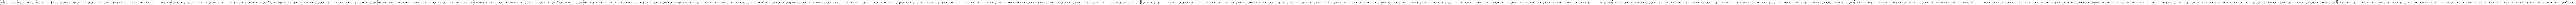

In [19]:
wavepa

In [20]:
arglambpa=(p(x,y,z,t+s),
          p(x,y,z,t),
          p(x,y,z-h,t),
          p(x,y,z+h,t),
          p(x+h,y,z-h,t),
          p(x-h,y,z,t),
          p(x-h,y,z+h,t),
          p(x+h,y,z,t),
          p(x,y+h,z,t),
          p(x,y-h,z,t),
          p(x+h,y-h,z,t),
          p(x-h,y+h,z,t),
          p(x,y+h,z-h,t),
          p(x,y-h,z,t),
          p(x,y-h,z+h,t),
          p(x,y+h,z,t),          
          r(x,y,z,t),
          r(x,y,z-h,t),
          r(x,y,z+h,t),
          r(x+h,y,z-h,t),
          r(x-h,y,z,t),
          r(x-h,y,z+h,t),
          r(x+h,y,z,t),
          r(x,y+h,z,t),
          r(x,y-h,z,t),
          r(x+h,y-h,z,t),
          r(x-h,y+h,z,t),
          r(x,y+h,z-h,t),
          r(x,y-h,z,t),
          r(x,y-h,z+h,t),
          r(x,y+h,z,t),
          A(x,y,z),
          A(x,y,z-h),
          A(x,y,z+h),
          A(x+h,y,z-h),
          A(x-h,y,z),
          A(x-h,y,z+h),
          A(x+h,y,z),
          A(x,y+h,z),
          A(x,y-h,z),
          A(x+h,y-h,z),
          A(x-h,y+h,z),
          A(x,y+h,z-h),
          A(x,y-h,z),
          A(x,y-h,z+h),
          A(x,y+h,z), 
          B(x,y,z),
          B(x,y,z-h),
          B(x,y,z+h),
          B(x+h,y,z-h),
          B(x-h,y,z),
          B(x-h,y,z+h),
          B(x+h,y,z),
          B(x,y+h,z),
          B(x,y-h,z),
          B(x+h,y-h,z),
          B(x-h,y+h,z),
          B(x,y+h,z-h),
          B(x,y-h,z),
          B(x,y-h,z+h),
          B(x,y+h,z),
          q , 
          m,
          Th,
          s, 
          h,
          e)
arglambra=(r(x,y,z,t+s), 
          p(x,y,z,t),
          p(x,y,z-h,t),
          p(x,y,z+h,t),
          p(x+h,y,z-h,t),
          p(x-h,y,z,t),
          p(x-h,y,z+h,t),
          p(x+h,y,z,t),
          p(x,y+h,z,t),
          p(x,y-h,z,t),
          p(x+h,y-h,z,t),
          p(x-h,y+h,z,t),
          p(x,y+h,z-h,t),
          p(x,y-h,z,t),
          p(x,y-h,z+h,t),
          p(x,y+h,z,t),          
          r(x,y,z,t),
          r(x,y,z-h,t),
          r(x,y,z+h,t),
          r(x+h,y,z-h,t),
          r(x-h,y,z,t),
          r(x-h,y,z+h,t),
          r(x+h,y,z,t),
          r(x,y+h,z,t),
          r(x,y-h,z,t),
          r(x+h,y-h,z,t),
          r(x-h,y+h,z,t),
          r(x,y+h,z-h,t),
          r(x,y-h,z,t),
          r(x,y-h,z+h,t),
          r(x,y+h,z,t),
          B(x,y,z),
          B(x,y,z-h),
          B(x,y,z+h),
          B(x+h,y,z-h),
          B(x-h,y,z),
          B(x-h,y,z+h),
          B(x+h,y,z),
          B(x,y+h,z),
          B(x,y-h,z),
          B(x+h,y-h,z),
          B(x-h,y+h,z),
          B(x,y+h,z-h),
          B(x,y-h,z),
          B(x,y-h,z+h),
          B(x,y+h,z),
          q , 
          m,
          Th,
          s, 
          h,
          e)

In [21]:
#arglambpa

In [22]:
stencilpa =solve(wavepa,p(x,y,z,t-s),simplify=False)[0]
tspa=lambdify(arglambpa,  stencilpa,  "numpy")
#factor(stencilp)

In [23]:
stencilra =solve(wavera,r(x,y,z,t-s),simplify=False)[0]
tsra=lambdify(arglambra,  stencilra,  "numpy")
#factor(stencilp)

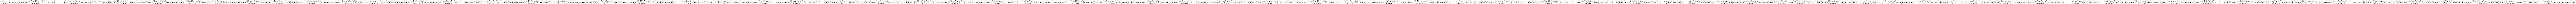

In [24]:
stencilra